# Simple Linear Regression

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing()

## Preparing the data

In [3]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(housing.data, columns=housing.feature_names)[["AveRooms"]]
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardise features

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Training the linear regression model

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [6]:
# Fit the model to the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Making predictions

In [7]:
y_pred = model.predict(X_test_scaled)

## Evaluating model performance

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.0138


In [9]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")

rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

Mean squared error: 1.2923
Root mean squared error: 1.1368


## Visualising the residuals and evaluations

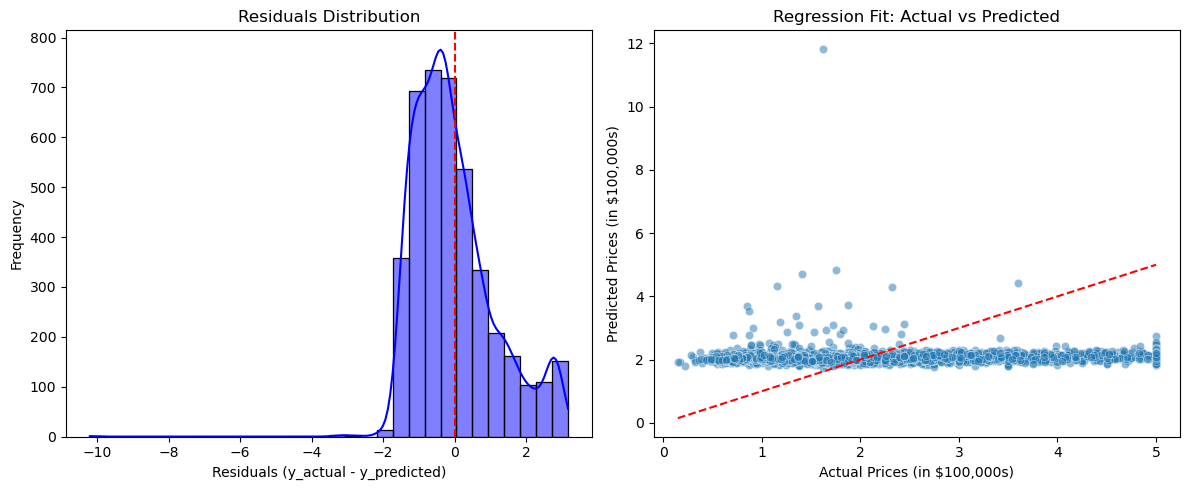

In [10]:
# Compute residuals.
residuals = y_test - y_pred


# Create plots.
plt.figure(figsize=(12,5))


# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")


# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Prices (in $100,000s)")
plt.ylabel("Predicted Prices (in $100,000s)")


# Show plots.
plt.tight_layout()
plt.show()

## Reference
https://www.datacamp.com/tutorial/sklearn-linear-regression